# Car Price Prediction Using ML

In [1]:
import pandas as pd   # It is used to make dataframe
import matplotlib.pyplot as plt    # It is used for making plots
import numpy as np   # use for numerical operations
import seaborn as sns    # It is used for data visualization that's built on top of Matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso    # It is used for variable selection and regularization .  It's used to identify the most important features in a dataset
from sklearn import metrics   # It is used for evaluating the performance of machine learning models

Data Collection and Pre-Procession

In [3]:
car_data = pd.read_csv('/content/car data.csv')

In [4]:
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [6]:
car_data.shape

(301, 9)

In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
# checking the distribution of categorical data
print(car_data.Fuel_Type.value_counts())
print(" ")
print(car_data.Selling_type.value_counts())
print(" ")
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
 
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
 
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding Categorical Data

In [14]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
print(" ")
car_data.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
print(" ")
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [15]:
car_data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliting the data into train and test data

In [16]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [17]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  Owner
0    2014           5.59       27000          0             0             0      0
1    2013           9.54       43000          1             0             0      0
2    2017           9.85        6900          0             0             0      0
3    2011           4.15        5200          0             0             0      0
4    2014           6.87       42450          1             0             0      0
..    ...            ...         ...        ...           ...           ...    ...
296  2016          11.60       33988          1             0             0      0
297  2015           5.90       60000          0             0             0      0
298  2009          11.00       87934          0             0             0      0
299  2017          12.50        9000          1             0             0      0
300  2016           5.90        5464          0             0             0      0

[30

In [18]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [20]:
X_train.shape

(270, 7)

In [21]:
X_test.shape

(31, 7)

In [23]:
X_test.head(5)

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
99,2010,20.450,50024,1,0,0,0
161,2014,0.826,23000,0,1,0,0
89,2014,6.760,40000,0,0,0,0
30,2012,5.980,51439,1,0,0,0
232,2015,14.790,12900,0,0,1,0


In [24]:
Y_train.head(5)

,Selling_Price
204,2.75
249,5.25
277,9.70
194,0.20
244,5.95


In [25]:
Y_train.shape

(270,)

In [26]:
# Linear Regression Model

In [27]:
lin_reg_model = LinearRegression()

In [28]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [29]:
# Prediction On Training Data

In [30]:
train_data_pred = lin_reg_model.predict(X_train)

In [31]:
# R Squared Error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8796483009370215


Visualize the actual prices and predicted price

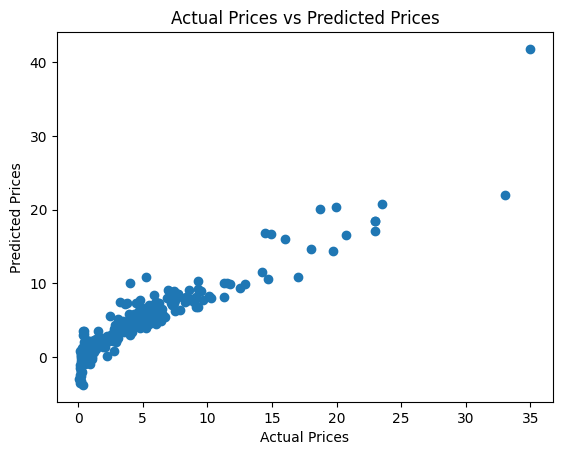

In [33]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [34]:
# Prediction On Training Data
test_data_pred = lin_reg_model.predict(X_test)

In [35]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8365861023210703


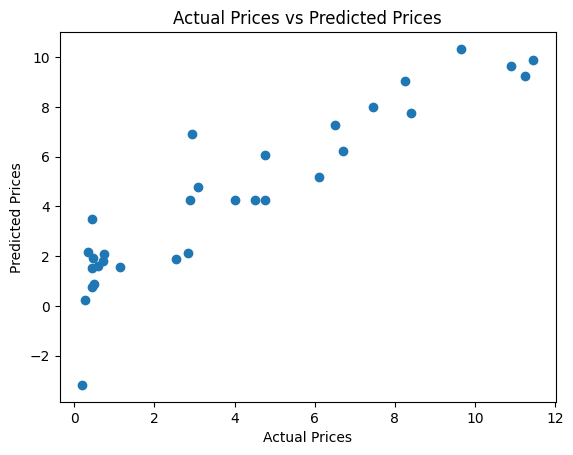

In [36]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Lasso Regression

In [37]:
lasso_reg_model = Lasso()

In [38]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [39]:
# Evaluation model
# prediction on training data

train_data_pred = lasso_reg_model.predict(X_train)

In [40]:
# R Squared Error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8424480718240743


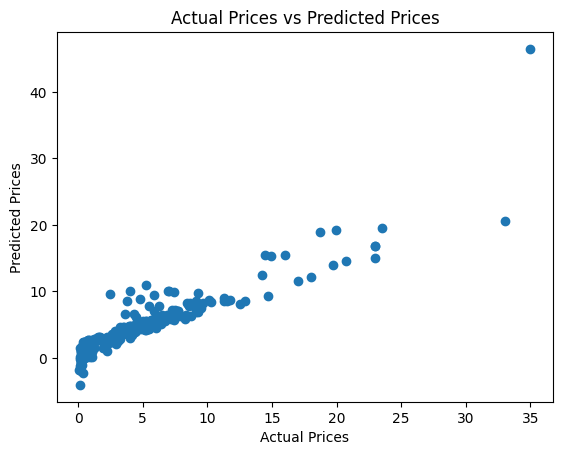

In [41]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [42]:
# Prediction On Testing Data

test_data_pred = lasso_reg_model.predict(X_test)

In [43]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error: ", error_score)

R Squared Error:  0.8709763132343395


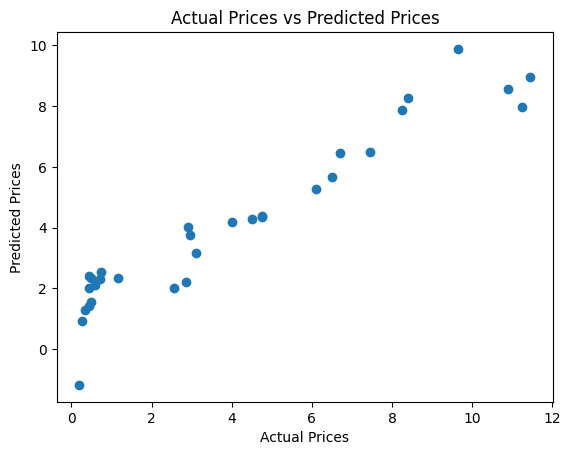

In [44]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()